## Experiment on Batch Size
* Here we have performed experiment with different batch sizes by using MNIST dataset wih LeNet architecture.
* We can  observe the smoothness of  loss curves as the batch size increases the loss curve becomes more smooth.

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Pre-Processing

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28, 1).astype('float32')

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(y_test.shape[1])

10


### LeNet Model

In [0]:
def LENet_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=( 28, 28, 1),strides=(1,1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
    
    model.add(Conv2D(16, (5, 5) ,strides=(1,1),activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = LENet_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dens

#### Keeping Batch Size "None"
- Here we are passing the entire dataset during the training. 
- Since we are taking the full dataset the model will take around 5 sec/epoch.
- In this case we will not get the smooth loss curve.

In [0]:
history =model.fit(X_train,y_train, validation_split=(0.20), epochs=25, batch_size=100, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 5s 114us/step - loss: 0.4116 - acc: 0.8759 - val_loss: 0.1298 - val_acc: 0.9631
Epoch 2/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.1152 - acc: 0.9644 - val_loss: 0.0876 - val_acc: 0.9738
Epoch 3/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.0802 - acc: 0.9758 - val_loss: 0.0805 - val_acc: 0.9753
Epoch 4/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0618 - val_acc: 0.9815
Epoch 5/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.0517 - acc: 0.9838 - val_loss: 0.0604 - val_acc: 0.9823
Epoch 6/25
48000/48000 [==============================] - 4s 80us/step - loss: 0.0442 - acc: 0.9859 - val_loss: 0.0539 - val_acc: 0.9841
Epoch 7/25
48000/48000 [==============================] - 4s 80us/step - loss: 

In [0]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(25)

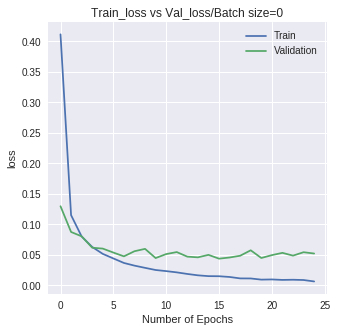

In [0]:
plt.figure(figsize=(5,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('Train_loss vs Val_loss/Batch size=0')
plt.legend(['Train','Validation'])

#### Keeping Batch Size ="1000"
- Here we are passing the dataset in the batches of 1000 samples during the training. 
- Since we are pasing the dataset batch by batch the model will take 1 sec/epoch.
- In this case we will not get the smooth curve.

In [0]:
history =model.fit(X_train,y_train, validation_split=(0.20), epochs=25, batch_size=1000, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 2s - loss: 1.1981 - acc: 0.6569 - val_loss: 0.3781 - val_acc: 0.8859
Epoch 2/25
 - 1s - loss: 0.3371 - acc: 0.9010 - val_loss: 0.2555 - val_acc: 0.9262
Epoch 3/25
 - 1s - loss: 0.2457 - acc: 0.9268 - val_loss: 0.1994 - val_acc: 0.9422
Epoch 4/25
 - 1s - loss: 0.1968 - acc: 0.9406 - val_loss: 0.1656 - val_acc: 0.9519
Epoch 5/25
 - 1s - loss: 0.1581 - acc: 0.9522 - val_loss: 0.1380 - val_acc: 0.9597
Epoch 6/25
 - 1s - loss: 0.1350 - acc: 0.9596 - val_loss: 0.1247 - val_acc: 0.9619
Epoch 7/25
 - 1s - loss: 0.1168 - acc: 0.9644 - val_loss: 0.1161 - val_acc: 0.9639
Epoch 8/25
 - 1s - loss: 0.1039 - acc: 0.9689 - val_loss: 0.1033 - val_acc: 0.9687
Epoch 9/25
 - 1s - loss: 0.0940 - acc: 0.9715 - val_loss: 0.0950 - val_acc: 0.9736
Epoch 10/25
 - 1s - loss: 0.0863 - acc: 0.9739 - val_loss: 0.0862 - val_acc: 0.9748
Epoch 11/25
 - 1s - loss: 0.0785 - acc: 0.9764 - val_loss: 0.0842 - val

In [0]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(25)

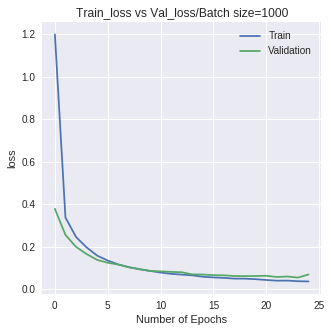

In [0]:
plt.figure(figsize=(5,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('Train_loss vs Val_loss/Batch size=1000')
plt.legend(['Train','Validation'])

#### Keeping Batch Size ="10000"
- Here we are passing the dataset in the batches of 10000 samples during the training. 
- Since we are pasing the dataset batch by batch the model will take 3 sec/epoch.
- In this case we will not get more better (smooth) loss curve.

In [0]:
history =model.fit(X_train,y_train, validation_split=(0.20), epochs=25, batch_size=10000, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 3s - loss: 2.2777 - acc: 0.2710 - val_loss: 2.2318 - val_acc: 0.4447
Epoch 2/25
 - 1s - loss: 2.1869 - acc: 0.4510 - val_loss: 2.0860 - val_acc: 0.4590
Epoch 3/25
 - 1s - loss: 1.9942 - acc: 0.4868 - val_loss: 1.7973 - val_acc: 0.5815
Epoch 4/25
 - 1s - loss: 1.6491 - acc: 0.6415 - val_loss: 1.3545 - val_acc: 0.7424
Epoch 5/25
 - 1s - loss: 1.1984 - acc: 0.7368 - val_loss: 0.9045 - val_acc: 0.7918
Epoch 6/25
 - 1s - loss: 0.8187 - acc: 0.7831 - val_loss: 0.6260 - val_acc: 0.8245
Epoch 7/25
 - 1s - loss: 0.6135 - acc: 0.8183 - val_loss: 0.5006 - val_acc: 0.8503
Epoch 8/25
 - 1s - loss: 0.5175 - acc: 0.8454 - val_loss: 0.4378 - val_acc: 0.8707
Epoch 9/25
 - 1s - loss: 0.4662 - acc: 0.8649 - val_loss: 0.4028 - val_acc: 0.8810
Epoch 10/25
 - 1s - loss: 0.4296 - acc: 0.8757 - val_loss: 0.3739 - val_acc: 0.8918
Epoch 11/25
 - 1s - loss: 0.4012 - acc: 0.8837 - val_loss: 0.3519 - val

In [0]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(25)

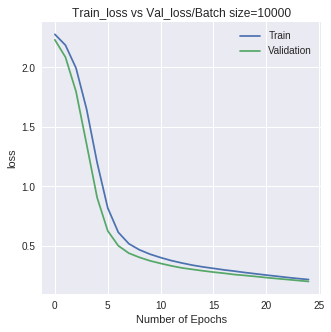

In [0]:
plt.figure(figsize=(5,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('Train_loss vs Val_loss/Batch size=10000')
plt.legend(['Train','Validation'])